## <center> Privacy-First Marketing: Rethinking Contextual Ads through Data Science </center>

### <center> Part 1: Data Cleaning and EDA </center>

### Table of Contents

1. [Problem Statement](#Problem-Statement)
    
    <br>
    
2. [Articles Category Dataset](#Articles-Category-Dataset)
    
    <br>
    
3. [Project Overview](#Project-Overview)
    <br>
4. [Data Dictionary](#Data-Dictionary)
    <br>
5. [Data Cleaning](#Data-Cleaning)

    <br>
    
6. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    <br>
    
7. [Handling Null Values](#Handling-Null-Values)
    
    <br>
    
8. [Summary](#Summary)


## Problem Statement

How can we use machine learning to help advertisers reach their target audiences in the digital marketing world post cookie depreciation? Google and other major digital tech companies are going through a transition in finding better ways to help brands connect with their potential customers in a privacy centric way.

### The Big Idea:  

What if there is a way to understand/classify the content that the user is interacting? This signal can then be capitalized to serve ads effectively, especially in a world where there is no personal identifiers (cookies, Mobile IDs). Example: A user browsing through articles on travel is most likely going to make that trip and it would only make sense to show ads relevant travel ads next to those articles. 

### Articles Category Dataset
This dataset contains around 210k news headlines from 2012 to 2022 from HuffPost. This is one of the biggest news datasets and can serve as a benchmark for a variety of computational linguistic tasks. HuffPost stopped maintaining an extensive archive of news articles sometime after this dataset was first collected in 2018, so it is not possible to collect such a dataset in the present day. Due to changes in the website, there are about 200k headlines between 2012 and May 2018 and 10k headlines between May 2018 and 2022.

### Project Overview

Our project is divided into 3 parts.

Part 1: Data Cleaning and Exploratory Data Analysis (EDA)

In this initial phase of our project, we focus on preparing and understanding our dataset. This involves thorough data cleaning to ensure the data is reliable and consistent. We will then dive into Exploratory Data Analysis (EDA) to uncover meaningful insights and patterns within the data. This essential groundwork lays the foundation for subsequent stages.

Part 2: Data Preprocessing and Text Transformation

Moving to the second part of our project, we concentrate on data preprocessing, especially for text data. This stage involves advanced techniques like text vectorization, tokenization, and word embeddings. These processes enable us to represent and process text data effectively, facilitating the development of our models.

Part 3: Building and Optimizing Baseline Models

In the final leg of our project, we construct initial baseline models. These models serve as the starting point for our analysis and predictions. We will then delve into hyperparameter optimization and other advanced techniques to enhance model performance. This phase is pivotal in achieving our project's objectives and delivering valuable insights.

As our first step, we will import the necessary libraries and packages.

In [91]:
# Importing necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity
from imblearn.over_sampling import SMOTE

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [92]:
# Reading the data from the source json file and writing it into a dataframe

df = pd.read_json('News_Category_Dataset_v3.json',lines=True)


# Setting the index to begin from 1
df.reset_index(drop=True, inplace=True)
df.index += 1

Let's have our first look into our dataset:

In [93]:
# First look at the loaded dataset

df.head(10)

,link,headline,category,short_description,authors,date
1,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
2,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
3,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
4,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
5,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
6,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
7,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
8,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
9,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
10,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


From the first look, we can see that there is a blank cell in row 6 under `authors` column. We will dive into analyzing them shortly but first let's create a Data Dictionary.

## Data Dictionary

| Feature      | Description                               |
|:--------------------|:------------------------------------------|
| category          | Category in which the article was published. |
| headline          | The headline of the news article.         |
| authors           | List of authors who contributed to the article. |
| link              | Link to the original news article.       |
| short_description | Abstract of the news article.            |
| date              | Publication date of the article.         |


## Data Cleaning

In [94]:
# Understanding the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 1 to 209527
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [95]:
# overall dimension
df.shape

(209527, 6)

**Note:** When we first looked at the data, we noticed that the "authors" column appeared to have some empty spots. These spots aren't necessarily missing data; they might actually contain empty spaces or extra spaces between words.

In [96]:
# replacing blanks with nan

df.replace("", np.nan, inplace=True)
df.replace(" ", np.nan, inplace=True)

### Missing Data

In [97]:
# Checking for null values throughout our dataset
print("Number of missing values in each variable:\n")
df.isna().sum()

Number of missing values in each variable:



link                     0
headline                 6
category                 0
short_description    19712
authors              37418
date                     0
dtype: int64

In the dataset, there are 19,712 instances where the `short_description` column has missing values. Similarly, the `authors` column has 37,418 missing values, and the `Headline` column has 6 missing values.

In [98]:
# Percent missing data:

print("Percentage missing values in each variable:\n")
print(f"{round(df.isna().sum() / df.shape[0] * 100, 2)}")

Percentage missing values in each variable:

link                  0.00
headline              0.00
category              0.00
short_description     9.41
authors              17.86
date                  0.00
dtype: float64


In percentage terms, the `short_description` column contains 9.41% missing values, while the `authors` column has 17.86% missing values.

Now, let's start by examining the **`short_description`** column.

In [99]:
# Creating a filter for null values under 'short description'

missing_sd = df["short_description"].isna()

In [100]:
# Grouping them by category

missing_value_by_category = df[missing_sd].groupby("category").size()

In [101]:
# Quick check on the data to confirm if the codes work as expected

missing_value_by_category

category
ARTS               646
BLACK VOICES       406
BUSINESS           860
COLLEGE            223
COMEDY             758
CRIME              730
CULTURE & ARTS      11
EDUCATION          112
ENTERTAINMENT     2588
ENVIRONMENT          2
FIFTY              359
FOOD & DRINK         9
GOOD NEWS          359
GREEN              576
HEALTHY LIVING    1429
HOME & LIVING        3
IMPACT             398
LATINO VOICES      108
MEDIA              540
MONEY                1
PARENTING            1
PARENTS            399
POLITICS          3161
QUEER VOICES       744
RELIGION           698
SCIENCE            403
SPORTS             663
STYLE              687
STYLE & BEAUTY      12
TASTE              156
TECH                 1
TRAVEL             479
WEIRD NEWS         461
WELLNESS             2
WOMEN              388
WORLD NEWS           2
WORLDPOST         1337
dtype: int64

In [102]:
# Arranging them by ascending order of missing counts

missing_value_by_category = missing_value_by_category.sort_values(ascending=True)

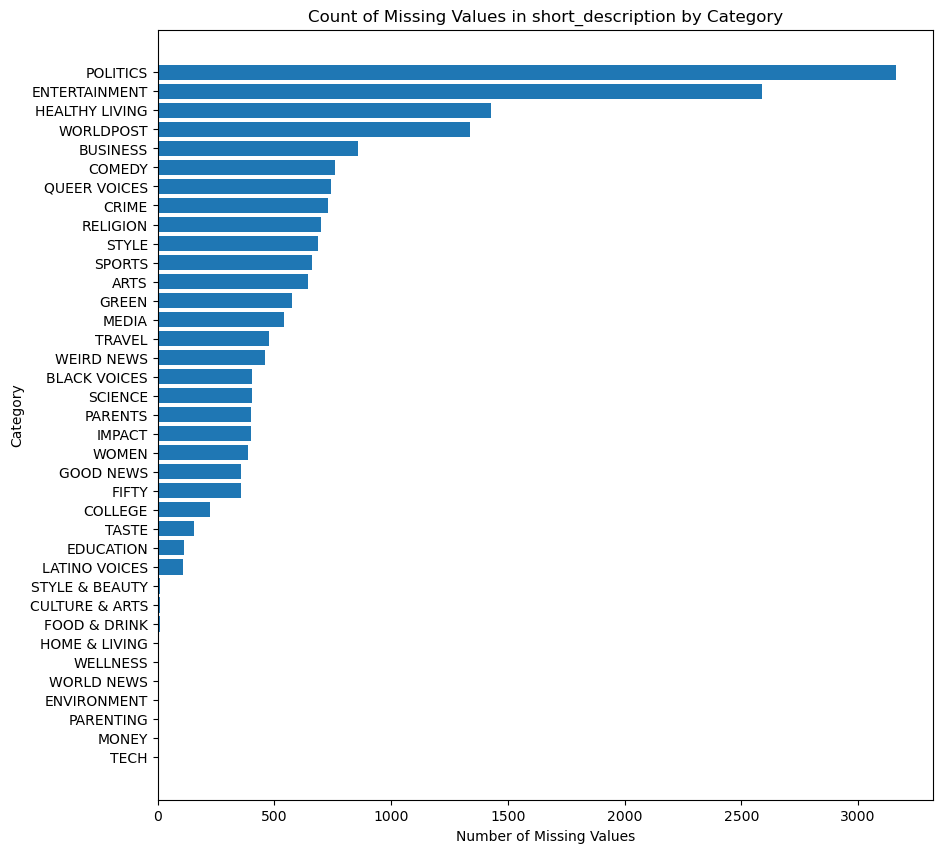

In [103]:
# plotting the missing counts in short description by category

plt.figure(figsize=(10, 10))
plt.barh(missing_value_by_category.index, missing_value_by_category.values)
plt.xlabel("Number of Missing Values")
plt.ylabel("Category")
plt.title("Count of Missing Values in short_description by Category")
plt.tight_layout
plt.show()

Visually, we can conclude that Politics, entertainment and healthy living have the highest counts of missing values among the categories.

In [104]:
# Calculate the percentage of missing values for each category and round it to two decimal places

result = pd.concat(
    [df.groupby("category").size(), df[missing_sd].groupby("category").size()], axis=1
)

result.columns = ["Total Count", "Missing Values"]

result["Percent SD Missing"] = round(
    (result["Missing Values"] / result["Total Count"]) * 100, 1
)

result

,Total Count,Missing Values,Percent SD Missing
category,,,
ARTS,1509,646.0,42.8
ARTS & CULTURE,1339,NaN,NaN
BLACK VOICES,4583,406.0,8.9
BUSINESS,5992,860.0,14.4
COLLEGE,1144,223.0,19.5
COMEDY,5400,758.0,14.0
CRIME,3562,730.0,20.5
CULTURE & ARTS,1074,11.0,1.0
DIVORCE,3426,NaN,NaN


Also, categories like "WORLDPOST," "RELIGION," and "STYLE" have high percentages of missing data (more than 25%).

**Note:** As observed earlier, the count of missing values in the "authors" column is approximately double that of the "short descriptions" column. However, since our primary predictors for the "category" are "short description and headline", removing all rows with missing values in "authors" could result in the loss of valuable information in the "short description" as well. Given this, it's important to conduct a more thorough analysis of the features before making decisions about how to handle or eliminate any rows.

### Duplicate Data

In [105]:
# Checking for duplicates and if any, finding their count

df.duplicated().sum()

13

There are 13 duplicated records in our dataset. Let's check the percent duplicates so that we can understand our data quality. 

In [106]:
# Calculate the percentage of duplicated data
percentage_duplicated = df.duplicated().sum() / df.shape[0] * 100

print(f"The percentage of duplicated data is {percentage_duplicated:.2f}%")


The percentage of duplicated data is 0.01%


In [107]:
# which rows are duplicates?

df[df.duplicated()]

,link,headline,category,short_description,authors,date
67678,https://www.huffingtonpost.comhttp://www.mothe...,"On Facebook, Trump's Longtime Butler Calls For...",POLITICS,"Anthony Senecal, who worked as Donald Trump's ...",NaN,2016-05-12
67924,https://www.huffingtonpost.comhttp://gizmodo.c...,Former Facebook Workers: We Routinely Suppress...,TECH,Facebook workers routinely suppressed news sto...,NaN,2016-05-09
70240,https://www.huffingtonpost.comhttp://www.cnbc....,"On Equal Pay Day, The Gap Is Still Too Wide",WOMEN,Equal Pay Day falls on April 12 in 2016. It's ...,NaN,2016-04-12
139831,https://www.huffingtonpost.comhttp://www.cnn.c...,The World's Most Dangerous Workout?,WELLNESS,"Is the ""sport of fitness"" the world's most dan...",NaN,2014-02-10
144410,https://www.huffingtonpost.comhttp://www.upwor...,Some People Call It 'The Best Anti-Smoking Ad ...,WELLNESS,Almost all smokers know cigarettes are bad for...,NaN,2013-12-22
145143,https://www.huffingtonpost.comhttp://www.weath...,10 Cities That Could Run Out Of Water - Weathe...,ENVIRONMENT,"Securing access to plentiful, renewable source...",NaN,2013-12-15
178156,https://www.huffingtonpost.comhttp://www.busin...,Google Is Attacking Apple From The Inside Out ...,TECH,After years of hammering away at Apple's share...,NaN,2013-01-01
187330,https://www.huffingtonpost.comhttp://www.nytim...,"Eating For Health, Not Weight",WELLNESS,Almost half of Americans are on a diet -- not ...,NaN,2012-09-23
194597,https://www.huffingtonpost.comhttp://blogs.wsj...,Apple Removes Green EPEAT Electronics Certific...,TECH,Apple has pulled its products off the U.S. gov...,NaN,2012-07-07
194599,https://www.huffingtonpost.comhttp://www.theda...,Microsoft's $6.2 Billion Writedown Shows It's ...,TECH,Fighting for online advertising dominance with...,NaN,2012-07-07


These are the 13 duplicated rows. Let's move on to drop these duplicated rows (~0.01%)

In [108]:
# checking the current dataframe shape

df.shape

(209527, 6)

In [109]:
# Drop duplicated rows from the DataFrame

df.drop_duplicates(inplace=True)

In [110]:
# Sanity check on the dataset after dropping the duplicates

df.shape

(209514, 6)

After eliminating the 13 duplicated rows, our dataset now consists of approximately 209,514 unique rows of information.

## Exploratory Data Analysis

### Are the authors equally popular?

In [111]:
df["authors"].value_counts()

Lee Moran                                                                 2954
Ron Dicker                                                                2219
Ed Mazza                                                                  1590
Mary Papenfuss                                                            1566
Reuters, Reuters                                                          1563
                                                                          ... 
Gina Carey, The Huffington Post                                              1
Randall Chase, Associated Press                                              1
Stephen Ohlemacher, AP                                                       1
Damian Carrington, The Guardian                                              1
John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff       1
Name: authors, Length: 29168, dtype: int64

In [112]:
df["authors"].isna().sum()

37405

In [113]:
df_authors = df.dropna(subset=["authors"]).copy()

In [114]:
# How many rows of data do we have with authors information:

df_authors.shape

(172109, 6)

In [115]:
df_authors["authors"].value_counts().sort_values(ascending=False).head(10)

Lee Moran           2954
Ron Dicker          2219
Ed Mazza            1590
Mary Papenfuss      1566
Reuters, Reuters    1563
Cole Delbyck        1266
Carly Ledbetter     1170
Curtis M. Wong      1146
Andy McDonald       1100
David Moye          1067
Name: authors, dtype: int64

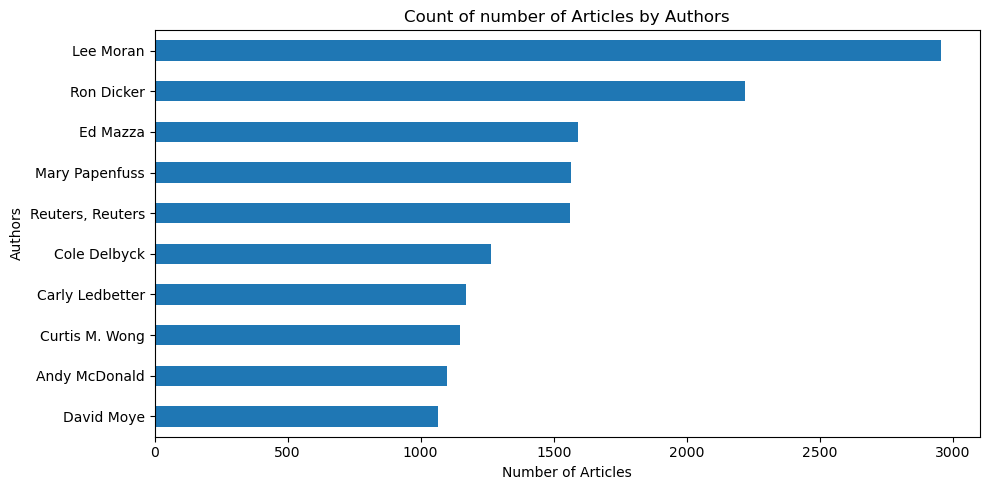

In [116]:
# Plot horizontal bar charts to visualize the count of each category:

plt.figure(figsize=(10, 5))
df_authors["authors"].value_counts().sort_values(ascending=True).tail(10).plot(
    kind="barh"
)
plt.xlabel("Number of Articles")
plt.ylabel("Authors")
plt.title("Count of number of Articles by Authors")
plt.tight_layout()
plt.show()

Among the authors, Lee Moran, Ron Dicker, and Ed Mazza stand out as the top three article writers, with 2954, 2219, and 1590 articles respectively.

### Article trends by month

In [117]:
# Deriving month from date

df["date"].dt.month

1         9
2         9
3         9
4         9
5         9
         ..
209523    1
209524    1
209525    1
209526    1
209527    1
Name: date, Length: 209514, dtype: int64

In [118]:
# Creating a new column to have the derived month

df["month_num"] = df["date"].dt.month

In [119]:
df["month_num"].value_counts()

3     19099
5     18625
4     18292
2     17875
8     17397
7     17295
10    17221
1     17161
6     16977
9     16589
12    16529
11    16454
Name: month_num, dtype: int64

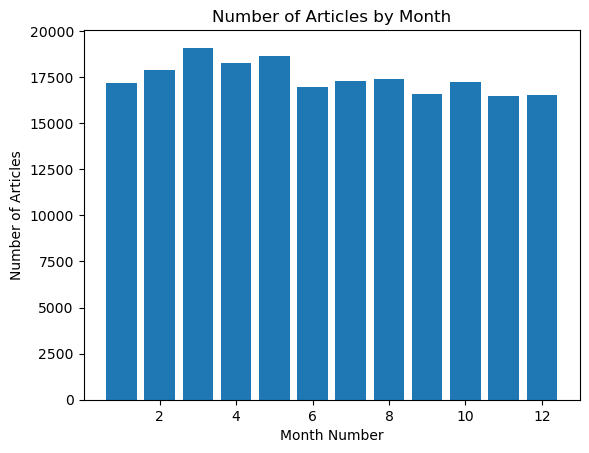

In [120]:
# Visualizing the number of articles trends by month

# Count the number of articles per month and sort by month number
month_counts = df["month_num"].value_counts().sort_index()

# Create a bar plot
plt.bar(month_counts.index, month_counts.values)

# Set labels and title
plt.xlabel("Month Number")
plt.ylabel("Number of Articles")
plt.title("Number of Articles by Month")

# Display the plot
plt.show()


Overall, there is fairly an equal distribution of articles through the months with the highest being March with 19,000 articles and the least being November with 16,450 articles.

In [121]:
trial = df.groupby(["month_num", "category"]).count().unstack()

In [122]:
trial["link"]

category,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,DIVORCE,EDUCATION,...,TECH,THE WORLDPOST,TRAVEL,U.S. NEWS,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
month_num,,,,,,,,,,,,,,,,,,,,,
1,92,130,414,499,79,462,309,74,250,60,...,168,286,794,68,246,272,1546,303,240,239
2,97,94,404,478,77,473,244,100,314,64,...,195,258,872,157,362,197,1877,244,230,172
3,117,126,433,477,58,518,287,138,361,55,...,200,336,1060,179,401,204,2027,326,233,196
4,169,105,365,555,103,450,295,108,355,114,...,173,362,930,97,395,239,1753,336,204,226
5,204,107,413,624,153,469,266,106,332,153,...,131,336,801,109,381,225,1284,400,272,299
6,162,102,349,600,110,314,253,71,340,110,...,133,205,794,158,321,137,1333,320,419,289
7,128,114,386,499,102,393,313,82,269,92,...,204,296,837,173,309,216,1344,245,401,267
8,114,112,401,413,122,389,338,70,323,75,...,139,329,847,198,307,236,1285,266,384,189
9,104,90,391,471,80,444,295,81,210,76,...,162,297,675,130,233,236,1326,238,326,205


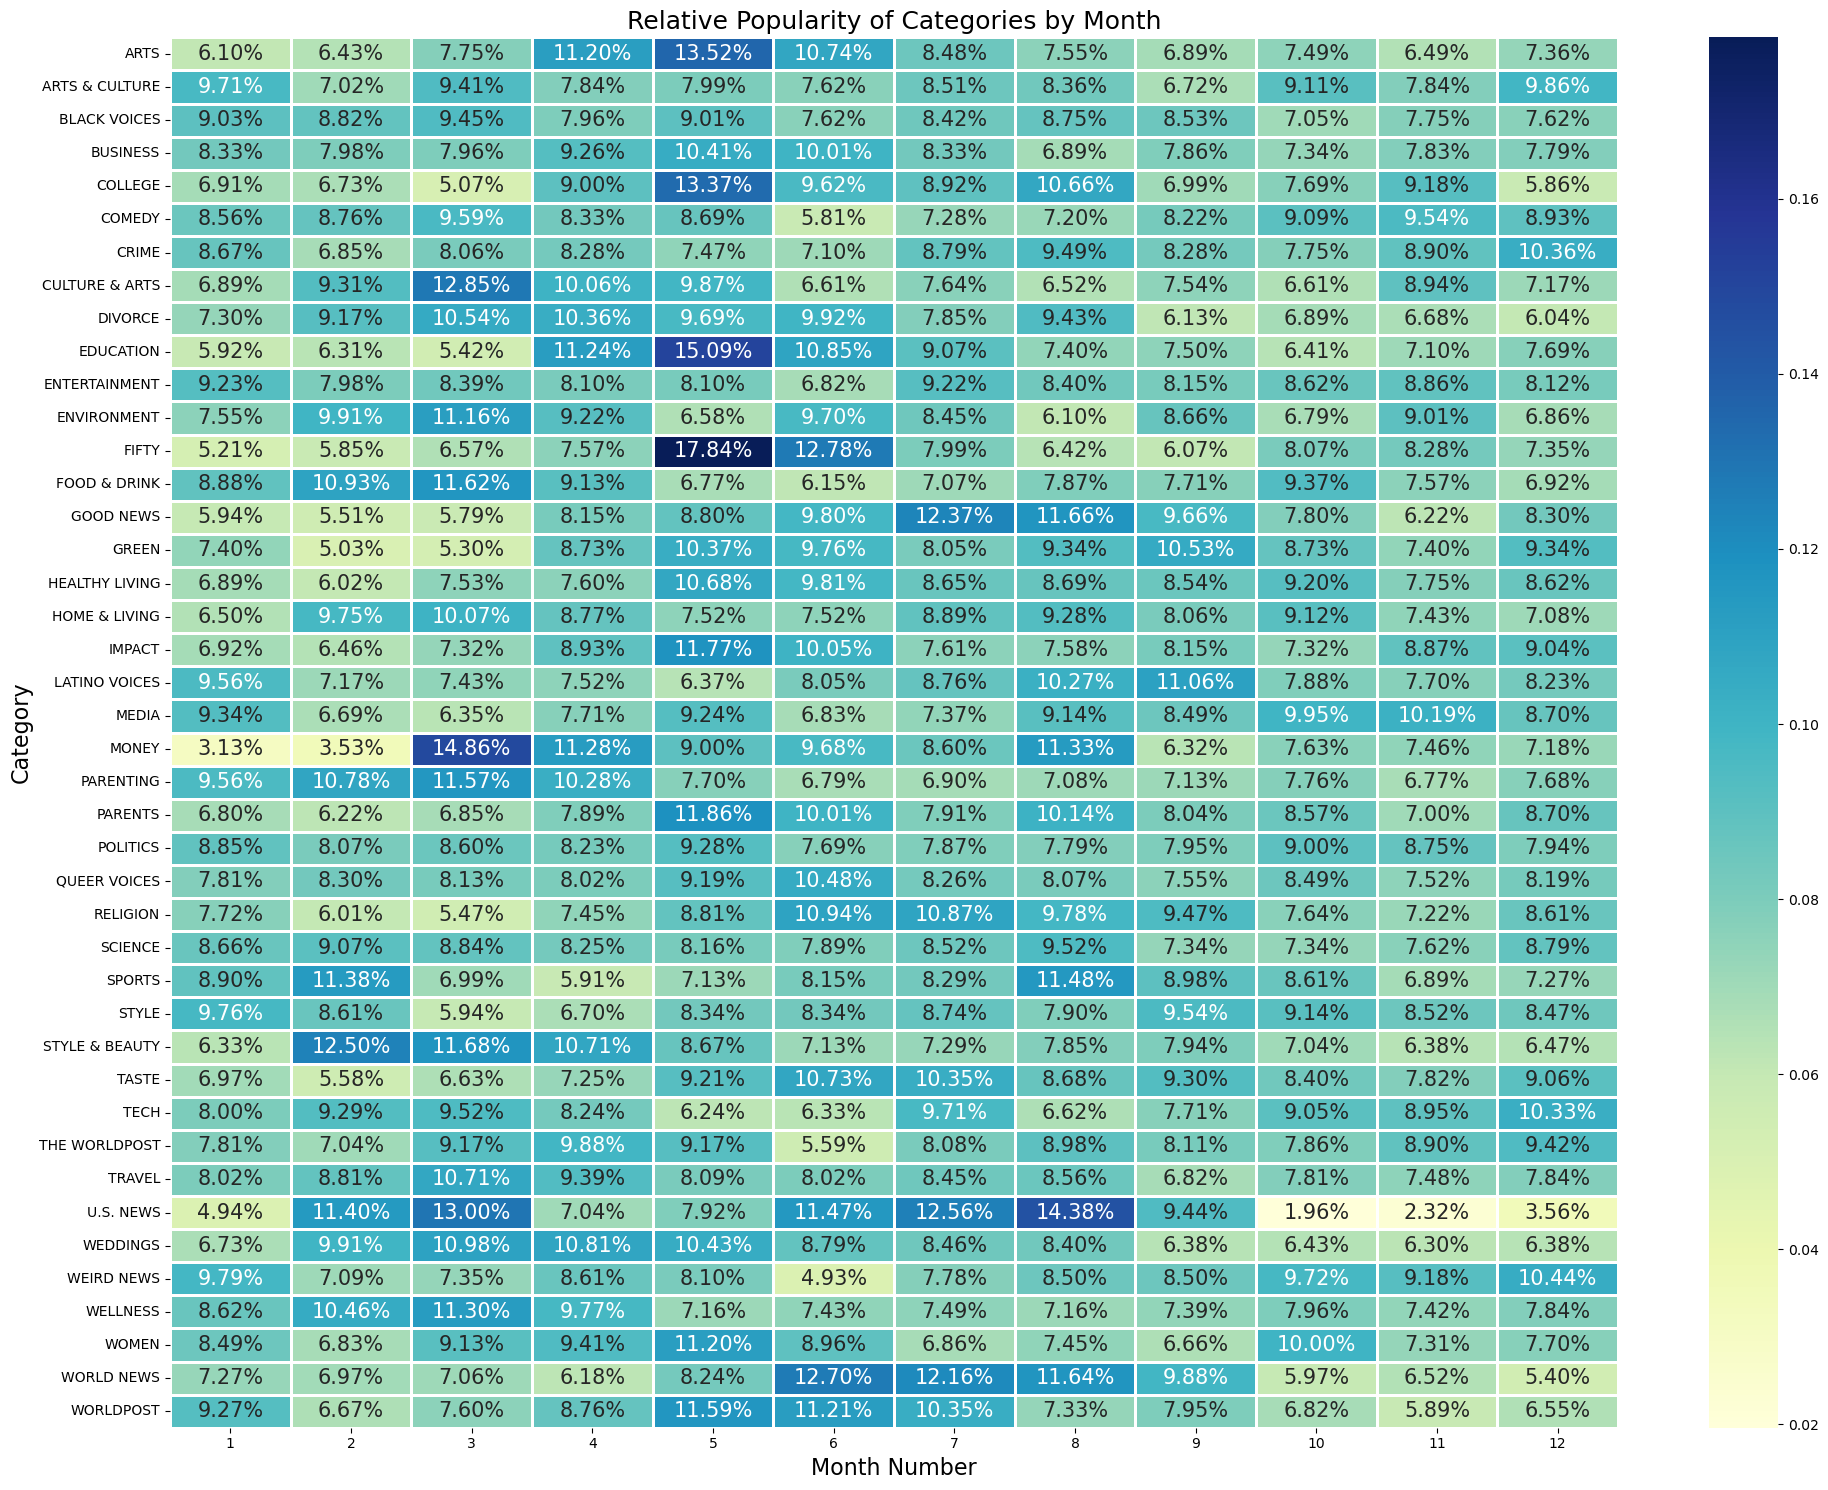

In [123]:
# Create a pivot table from the trial DataFrame
heatmap_data = trial["link"].T  # Transpose the DataFrame for categories on the x-axis

# Normalize the data within each category
normalized_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

plt.figure(figsize=(20, 15))

sns.heatmap(normalized_data, cmap= "YlGnBu", annot=True, fmt=".2%", linewidths=0.8, annot_kws={"fontsize": 15})

plt.xlabel("Month Number", fontsize=16)
plt.ylabel("Category", fontsize=16)
plt.title("Relative Popularity of Categories by Month", fontsize=18)
plt.tight_layout()

plt.show()


This visualization effectively illustrates the months with varying levels of popularity within a specific category. For instance, it highlights that May shows notably higher popularity for Arts compared to January.

Advertisers/Publishers can gauge which month is really beneficial for their marketing campaigns based on their domain categories.

### Article trends by year

In [124]:
# Creating a new columnn to derive year values from date field.

df["year"] = df["date"].dt.year

In [125]:
# Sanity check to confirm years are derived

df["year"].head()

1    2022
2    2022
3    2022
4    2022
5    2022
Name: year, dtype: int64

In [126]:
# Grouping the data by year and adding the number of records in each year under 'count'

articles_by_year = df.groupby("year").size().reset_index(name="count")

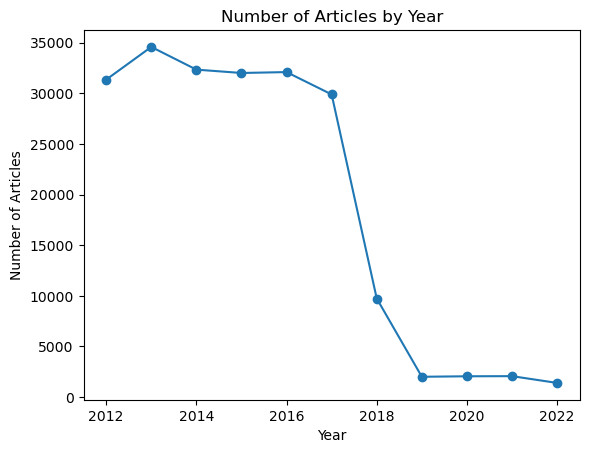

In [127]:
# Visualizing the trend in nmber of articles over the years

# Create a line plot
plt.plot(articles_by_year["year"], articles_by_year["count"], marker='o')

# Set labels and title
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Number of Articles by Year")

# Display the plot
plt.show()


#### According to the provided data, the data collection process was comprehensive from 2012 to 2017. However, after 2018, there was a change in how Huffingpost archived articles, resulting in a decline in the number of articles collected.

### Handling Null Values 

In [128]:
# Creating a separate dataframe before dropping any data

df_categories = df.copy()

In [129]:
# Current shape of our dataframe
df_categories.shape

(209514, 8)

There are about 209,514 rows in the current dataframe (Note: We already removed duplicates).

In [130]:
# Checking for null values throughout our dataset.
print("Number of missing values in each variable:\n")
df_categories.isna().sum()

Number of missing values in each variable:



link                     0
headline                 6
category                 0
short_description    19712
authors              37405
date                     0
month_num                0
year                     0
dtype: int64

Now, let's proceed to drop null values in 'short_description' and 'headline' columns.

In [131]:
# Drop rows with null values in the 'short_description' and 'headline' columns
df_categories.dropna(subset=["short_description", "headline"], inplace=True)

In [132]:
# Shape after dropping rows with null values in short description
df_categories.shape

(189801, 8)

In [133]:
df_categories["category"].nunique()

42

In the following step, we will consolidate the information from the '`headline`' and '`short_description`' columns into a new column called '`article_text`.' This action is being taken to facilitate data processing and analysis, providing a unified source of text data for our project.

Also based on the domain knowledge, we can confirm that the 'article_text' column, generated by merging the 'headline' and 'short_description' columns, will play a pivotal role in predicting the target category labels.

In [134]:
df_categories['article_text'] = df_categories['headline']+' '+df_categories['short_description']
df_categories.head()

,link,headline,category,short_description,authors,date,month_num,year,article_text
1,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,9,2022,Over 4 Million Americans Roll Up Sleeves For O...
2,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,9,2022,"American Airlines Flyer Charged, Banned For Li..."
3,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,9,2022,23 Of The Funniest Tweets About Cats And Dogs ...
4,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,9,2022,The Funniest Tweets From Parents This Week (Se...
5,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,9,2022,Woman Who Called Cops On Black Bird-Watcher Lo...


In [135]:
# Shape after combining short description and headline columns.
df_categories.shape

(189801, 9)

In [136]:
# Write the cleaned DataFrame to a CSV file
df_categories.to_csv("cleaned_categories.csv", index=False)

## Summary

As we conclude Part 1, which involved data cleaning and exploratory data analysis (EDA), we now have a dataset containing 189,801 rows and 9 columns. These columns encompass data from 42 distinct article categories. In the upcoming section, Part 2, we will delve into data preprocessing and text transformations, ultimately preparing the data for modeling.